In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate

## Aliasing

3000
600


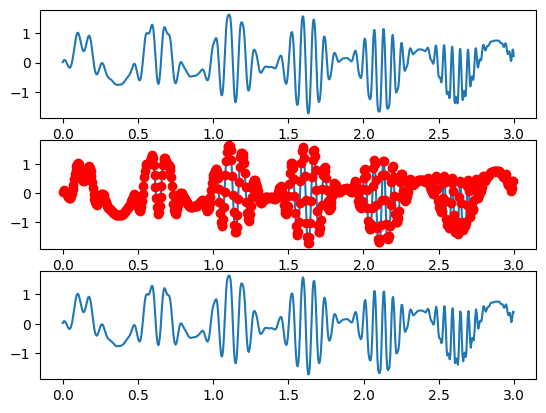

In [ ]:
## Code for pictures shown in slides

srate = 1000
t = np.arange(0,3,1/srate)
print(len(t))
signal = scipy.signal.detrend(np.multiply(1+np.sin(2*np.pi*2*t),np.cos(np.sin(2*np.pi*5*t+np.cumsum(t/30))+t)))

plt.subplot2grid((3,1),(0,0))
plt.plot(t,signal)

plt.subplot2grid((3,1),(1,0))
k = 5 #or 25 #steps to go from 0 to 3 seconds #less steps or more time points gives better res
plt.plot(t,signal)
plt.plot(t[range(1,len(t),k)],signal[range(1,len(t),k)],'ro')
print(len(range(1,len(t),k)))

plt.subplot2grid((3,1),(2,0))
plt.plot(t[range(1,len(t),k)],signal[range(1,len(t),k)])
plt.show()





```
The  steps=5  in between time, better temporal resolution than steps = 25

```



Text(0.5, 1.0, 'Frequency domain of "analog" signal')

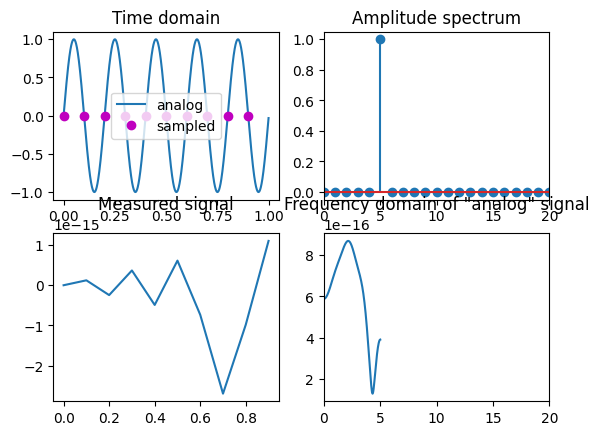

In [ ]:
## also show in the lecture slides

# simulation params
srate  = 1000
time   = np.arange(0,1,1/srate)
npnts  = len(time)
signal = np.sin(2*np.pi*5*time)


# measurement parameters
msrate = 10 # hz #more than 2 * nyquist freq is expected
mtime  = np.arange(0,1,1/msrate)
midx   = np.zeros(len(mtime),dtype=int)
for i in range(0,len(midx)):
    midx[i] = np.argmin(np.abs(time-mtime[i]))


# plot the time-domain signals
plt.subplot2grid((2,2), (0,0))
plt.plot(time,signal,label='analog')
plt.plot(time[midx],signal[midx],'mo',label='sampled')
plt.title('Time domain')
plt.legend()


# plot the power spectrum of the "analog" signal
plt.subplot2grid((2,2),(0,1))
sigX = 2*np.abs(scipy.fftpack.fft(signal,npnts)/npnts)
hz   = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
plt.stem(hz,sigX[0:len(hz)])
plt.xlim([0,20])
plt.title('Amplitude spectrum')


# now plot only the measured signal
plt.subplot2grid((2,2),(1,0))
plt.plot(time[midx],signal[midx])
plt.title('Measured signal')

# and its amplitude spectrum
plt.subplot2grid((2,2),(1,1))
sigX = 2*np.abs(scipy.fftpack.fft(signal[midx],npnts)/len(midx))
hz   = np.linspace(0,msrate/2,int(np.floor(npnts/2)+1))

plt.plot(hz,sigX[0:len(hz)])
plt.xlim([0,20])
plt.title('Frequency domain of "analog" signal')



```
Original signal was sampled at 1000 hz but we measured at 10 hz.
Result: Aliasing
```



1000


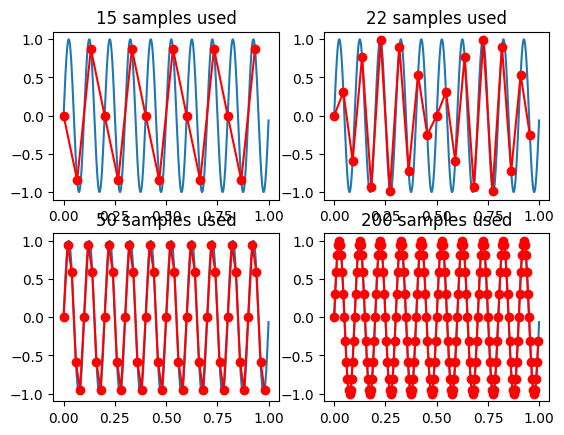

In [ ]:
## Related: getting close to the Nyquist

# subsample a high-sampling rate sine wave (pretend it's a continuous wave)
srate = 1000
time = np.arange(0,1,1/srate)
pnts = len(time)
print(pnts)
f = 10 # Frequency of sine wave
signal = np.sin(2*np.pi*f*time)

# "Measurement" sampling rates
srate = [15,22,50,200]

for si in range(0,4):

    #find the right subplot
    loc = np.unravel_index(si,[2,2],'F') # gives loc (0,0),(1,0),(0,1),(1,1)
                #Converts a flat index or array of flat indices into a tuple of coordinate arrays.
    plt.subplot2grid((2,2),(loc[1],loc[0]))             #Create a subplot at a specific location inside a regular grid.

    # plot 'Continuous' Sine wave
    plt.plot(time,signal)

    # Plot sampled sine wave
    samples = np.arange(0,len(time),1000/srate[si]) # For srate = 15, step = 1000/15 = 66.66... ie, 0-1000 ma 10 ota value hunxa
    samples = list(map(int,samples))
    plt.plot(time[samples],signal[samples],'ro-')
    plt.title('%d samples used' %(srate[si]))


plt.show()

In [ ]:
# Practice cell

## unravel index
location = np.unravel_index(0,[2,2],'F') # F = Column major
print(location)

location2 = np.unravel_index([0,1,2,3],[2,2],'F') # F = Column major
print(location2)


##
a = np.arange(0,10,1)#array banako
a = list(map(int,a)) #map le map object dinxa and convert to list
a

(0, 0)
(array([0, 1, 0, 1]), array([0, 0, 1, 1]))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
samples = np.arange(0,1000,1000/200)
samples

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
       275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
       330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
       385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
       440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
       495., 500., 505., 510., 515., 520., 525., 530., 535., 540., 545.,
       550., 555., 560., 565., 570., 575., 580., 585., 590., 595., 600.,
       605., 610., 615., 620., 625., 630., 635., 640., 645., 650., 655.,
       660., 665., 670., 675., 680., 685., 690., 695., 700., 705., 710.,
       715., 720., 725., 730., 735., 740., 745., 75

## Effects of non-stationarities on power spectra

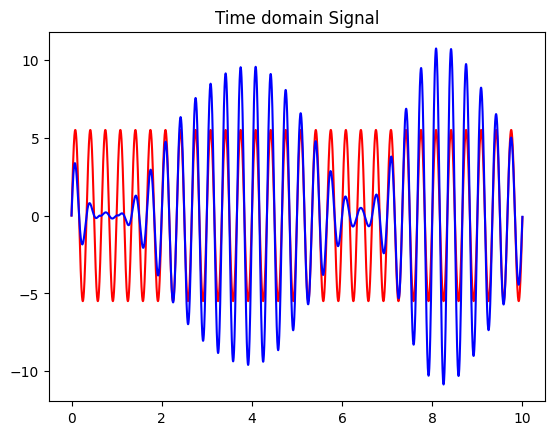

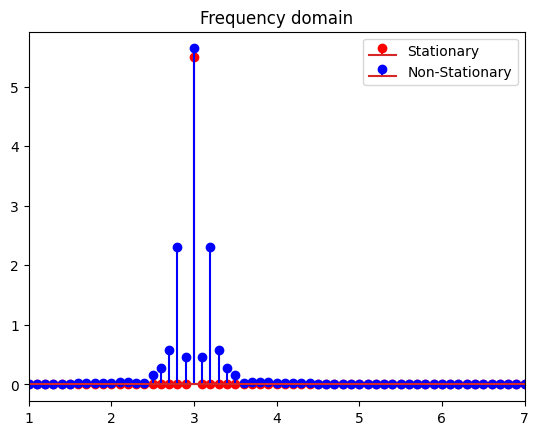

In [ ]:
## Amplitude non stationarity

srate = 1000
t = np.arange(0,10,1/srate)
n = len(t)
f = 3

# (1)sine wave with time inc amplitude
ampl1 = np.linspace(1,10,n) # n ota values
ampl2 = np.mean(ampl1) #5.5

# (2)uncomment the next lines for an AM-radio-like signal
y1 = 10*np.random.rand(10)
fr = interpolate.interp1d(np.linspace(t[0],t[-1],10),y1,kind='cubic')
ampl1 = np.abs(fr(t))

signal1 = np.multiply(ampl1,np.sin(2*np.pi*f*t))#Amplitude Non stationarity signal
signal2 = np.multiply(ampl2,np.sin(2*np.pi*f*t))#stationary signal

# Obtain Fourier coefficients and Hz vector
signal1X = scipy.fftpack.fft(signal1)/n
signal2X = scipy.fftpack.fft(signal2)/n

hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(t,signal2,'r')
plt.plot(t,signal1,'b')
plt.title('Time domain Signal')
plt.show()

plt.stem(hz,2*np.abs(signal2X[0:len(hz)]),'ro-',label='Stationary')
plt.stem(hz,2*np.abs(signal1X[0:len(hz)]),'bs-',label='Non-Stationary')
plt.xlim([1,7])
plt.legend()
plt.title('Frequency domain')
plt.show()




```
Non stationary signal requires dispersion near 3 hz to reconstruct complete signal.

Stationary signal doesnot require that.
```



[2.         2.00040004 2.00080008 ... 5.99919992 5.99959996 6.        ]
(10000,)


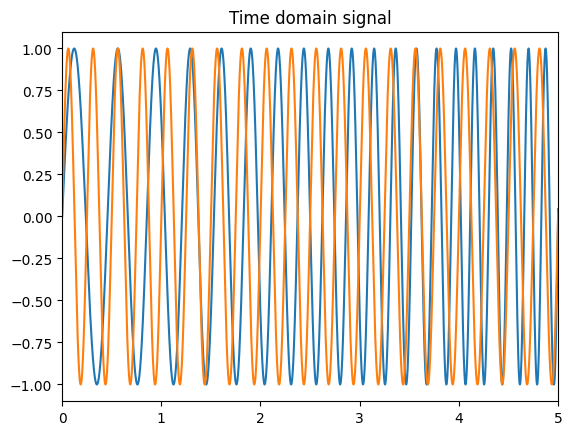

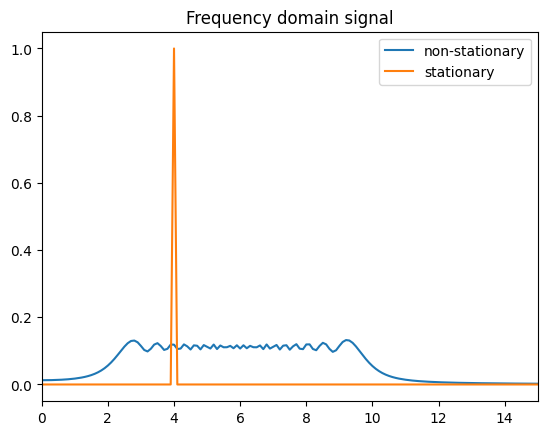

In [ ]:
## Frequencies non stationarities

#create signals(sine wave and linear chirp)
f = [2,10]
ff = np.linspace(f[0],np.mean(f),n)
print(ff) # 2 to 6 with 10000 values
print(ff.shape)

signal1 = np.sin(2*np.pi*ff*t) #linear chirp
signal2 = np.sin(2*np.pi*np.mean(ff)*t)#sine wave

# Compute FFTs
signal1X = scipy.fftpack.fft(signal1)/n
signal2X = scipy.fftpack.fft(signal2)/n

hz = np.linspace(0,srate/2, int(np.floor(n/2)))

plt.plot(t,signal1)
plt.plot(t,signal2)
plt.xlim([0,5])

plt.title('Time domain signal')
plt.show()

plt.plot(hz,2*abs(signal1X[0:len(hz)]),label='non-stationary')
plt.plot(hz,2*abs(signal2X[0:len(hz)]),label='stationary')
plt.title('Frequency domain signal')
plt.xlim([0,15])
plt.legend()
plt.show()


[    0.  2500.  5000.  7500. 10000.] 10000


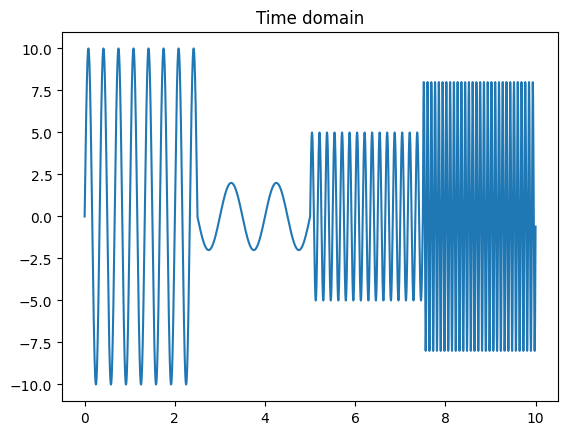

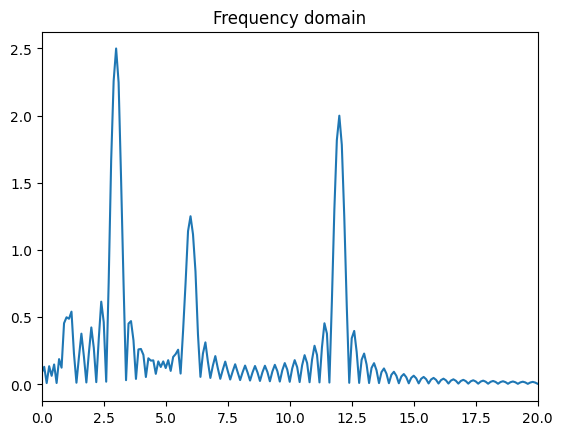

In [ ]:
## Sharp Transitions

a = [10,2,5,8] # amplitude
f = [3,1,6,12] #Freq

timechunks = np.round(np.linspace(0,n,len(a)+1))
print(timechunks, n)

sig1 = a[0]*np.sin(2*np.pi*f[0]*t[int(timechunks[0]):int(timechunks[1])])
sig2 = a[1]*np.sin(2*np.pi*f[1]*t[int(timechunks[1]):int(timechunks[2])])
sig3 = a[2]*np.sin(2*np.pi*f[2]*t[int(timechunks[2]):int(timechunks[3])])
sig4 = a[3]*np.sin(2*np.pi*f[3]*t[int(timechunks[3]):int(timechunks[4])])

signal= np.concatenate((sig1,sig2,sig3,sig4),axis=0)

plt.plot(t,signal)
plt.title('Time domain')
plt.show()

signalX = scipy.fftpack.fft(signal)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(hz,2*abs(signalX[0:len(hz)]))
plt.title('Frequency domain')
plt.xlim([0,20])
plt.show()

(999,)
(1998,)


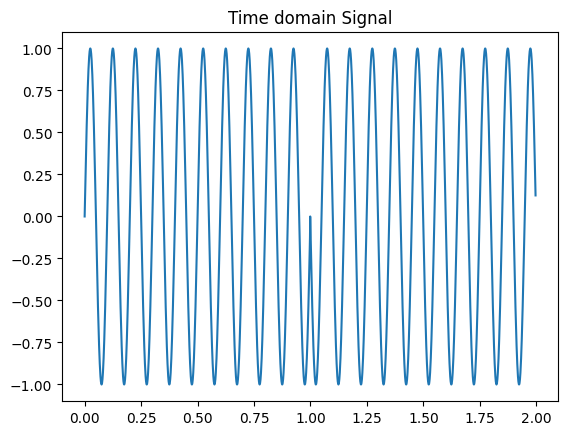

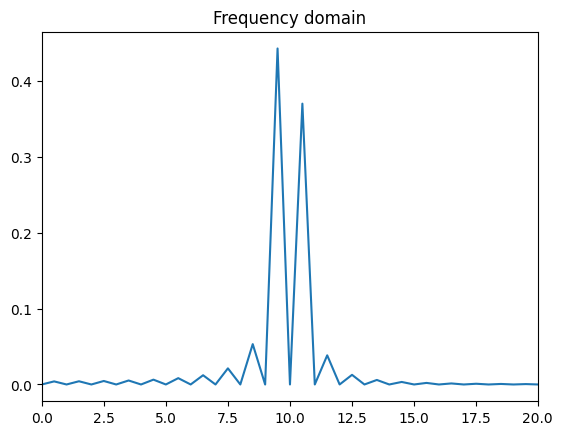

In [ ]:
## Phase reversal

srate = 1000
ttime = np.arange(0,1-1/srate,1/srate) # temp time , for creating half of the signal
time = np.arange(0,2-2/srate,1/srate) # signals time vector
n = len(time)

print(ttime.shape)
print(time.shape)

signal = np.concatenate((np.sin(2*np.pi*10*ttime), -np.sin(2*np.pi*10*ttime)), axis=0)

plt.plot(time,signal)
plt.title('Time domain Signal')
plt.show()

signalAmp = (2*np.abs(scipy.fftpack.fft(signal)/n))**2
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(hz,signalAmp[0:len(hz)])
plt.title('Frequency domain')
plt.xlim([0,20])
plt.show()




```
At 10 hz(F-domain), amplitude is zero! wtf!

sine wave * phase reversed sine wave = 0

broken time point at phase transition gives small bumps near 10 hz.

```



10000


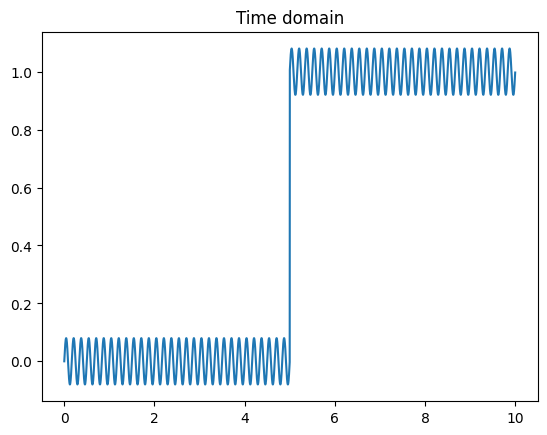

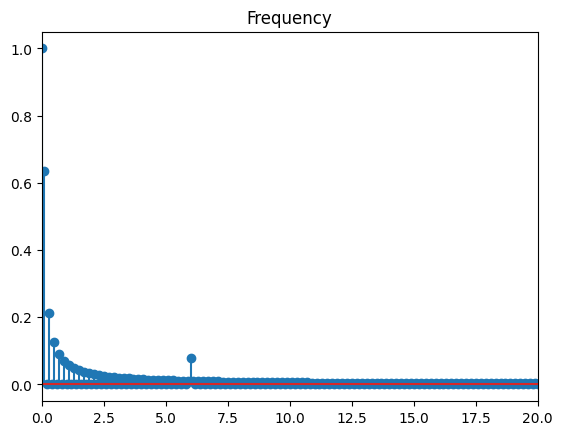

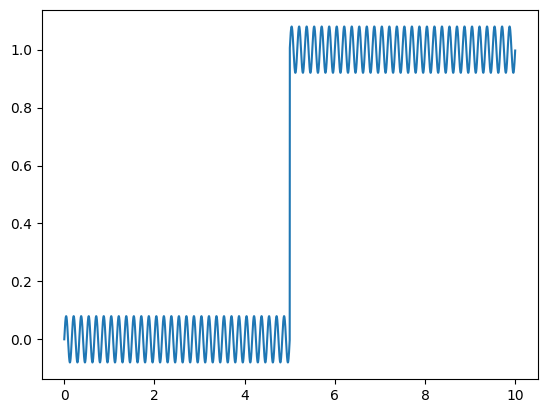

In [ ]:
## Edges and edge artifacts

n = len(t)
print(n)
x = np.linspace(0,1,n)>.5 #Non stationary signal

# uncommenting this line shows that
# nonstationarities do not prevent stationary signals from being easily observed
x = x + 0.08*np.sin(2*np.pi*6*t)

plt.plot(t,x)
plt.title('Time domain')
plt.show()

xX = scipy.fftpack.fft(x)/n
hz = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.stem(hz,2*np.abs(xX[0:len(hz)]))
plt.xlim([0,20])
plt.title('Frequency')
plt.show()

recon = scipy.fftpack.ifft(xX*n)
plt.plot(t,recon)
plt.show()



```
edge in time domain can be reconstructed using many sine waves at different frequencies.

#non stationarity + stationarity
we can see stationary signal easily.
```



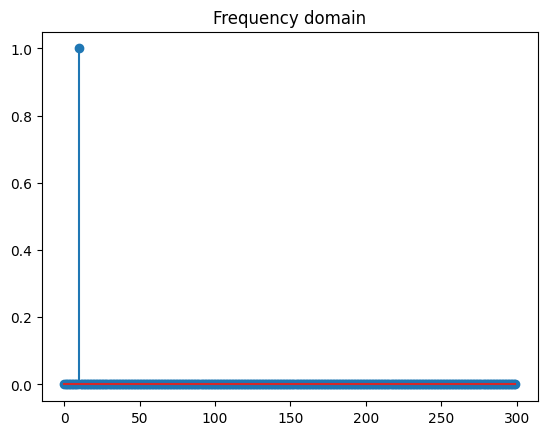

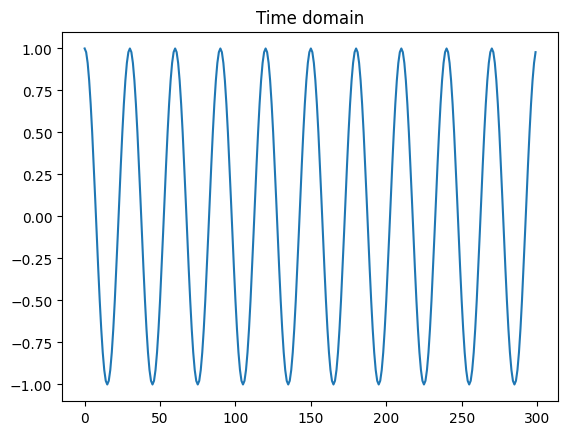

In [ ]:
## Spike in the frequency domain

# frequency spectrum with a spike
fspect = np.zeros(300)
fspect[10] = 1

#time domain signal via iFFT
td_sig = np.real(scipy.fftpack.ifft(fspect))*len(fspect)

plt.stem(fspect)
plt.title('Frequency domain')
plt.show()

plt.plot(td_sig)
plt.title('Time domain')
plt.show()



```
freq spectra ma one spike means there is sine wave in time domain
```



## Solutions for non-stationary time series

[10.        10.0020004 10.0040008 ... 19.9959992 19.9979996 20.       ]


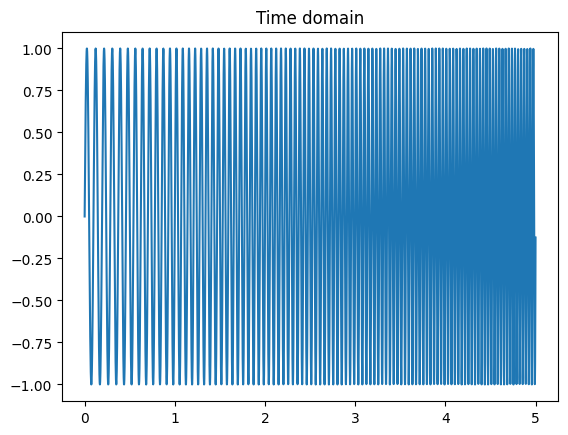

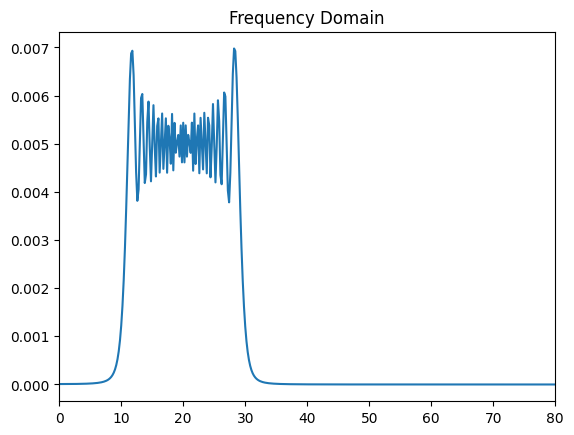

In [ ]:
## Create a signal (chirp) [5 second signal with freq from 10-30 hz]

fs = 1000
time = np.arange(0,5,1/fs)
npnts = len(time)
f = [10,30]
ff = np.linspace(f[0],np.mean(f),npnts)
print(ff)

signal = np.sin(2*np.pi*ff*time)

plt.plot(time,signal)
plt.title('Time domain')
plt.show()

sigpow = 2*np.abs(scipy.fftpack.fft(signal)/npnts)**2
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))

plt.plot(hz,sigpow[0:len(hz)])
plt.xlim([0,80])
plt.title('Frequency Domain')
plt.show()

5000
180.0
251
(251,)


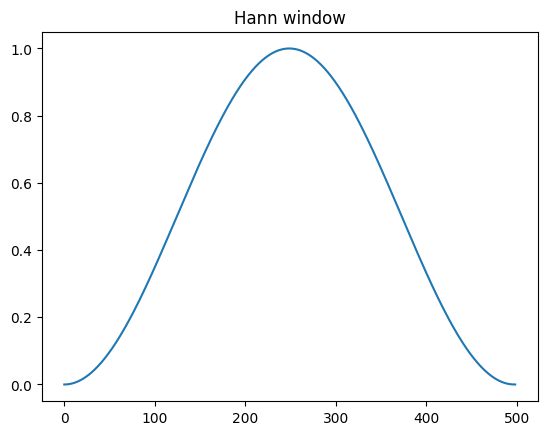

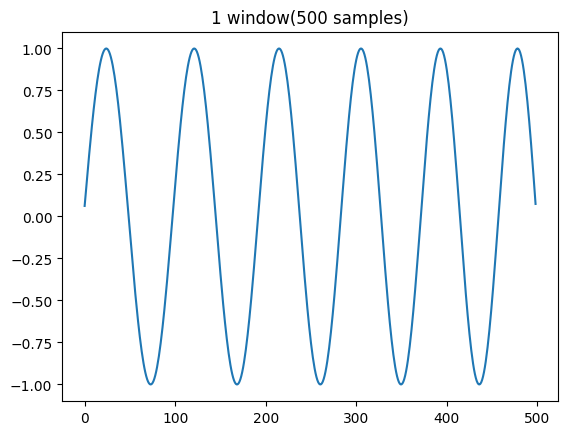

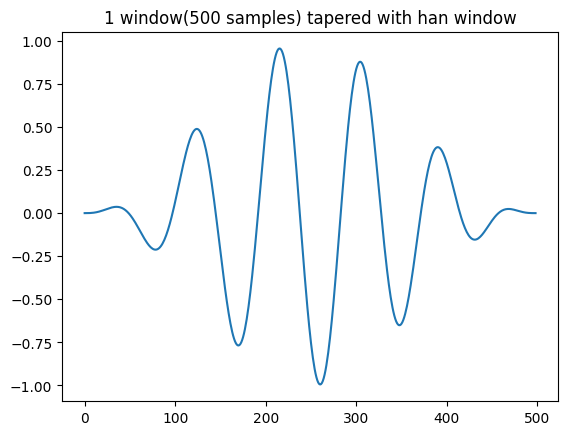

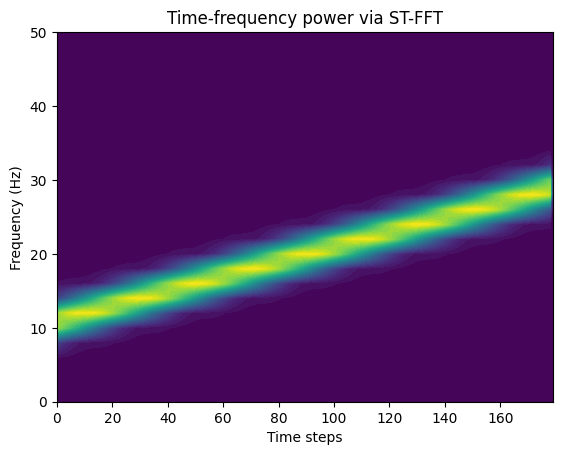

In [ ]:

## Short time FFT

winlen = 500 #Window length
stepsize = 25 #stepsize for ST FFT
numsteps = np.floor((npnts-winlen)/stepsize) # number of steps
print(npnts)
print(numsteps)

hz = np.linspace(0, fs/2, int(np.floor(winlen/2)+1))
print(int(np.floor(winlen/2)+1))
print(hz.shape)

# initialize Time frequency matrix
tf = np.zeros((len(hz),int(numsteps))) #251 x 180

# HAnn taper
hwin = .5*(1-np.cos(2*np.pi*np.linspace(0,winlen,winlen-1)/ (winlen-1)))

plt.plot(hwin)
plt.title('Hann window')
plt.show()

i=1
# loop over time windows
for ti in range(0,int(numsteps)-1): ##180 steps

    # extract part of the signal
    tidx = range(ti*stepsize+1, ti*stepsize+winlen)
    tapdata = signal[tidx] # take only 500 samples in each step

    if i ==1:
      plt.plot(tapdata)
      plt.title('1 window(500 samples)')
      plt.show()

      plt.plot(np.multiply(hwin,tapdata))#First tappered signal visualized
      plt.title('1 window(500 samples) tapered with han window')
      plt.show()
      i =2

    # FFt
    x = scipy.fftpack.fft(np.multiply(hwin,tapdata))/winlen # hanwindow * tapdata ===> Large in middle and tapers at boundry(helps to remove sharp edges at boundry)

    #put in matrix
    tf[:,ti] = 2*np.abs(x[0:len(hz)]) #matrix ko ith column ma 251 value halne

plt.contourf(range(0,int(numsteps)),hz,tf,40)
plt.ylim([0,50])
plt.clim([0,.5])
plt.xlabel('Time steps')
plt.ylabel('Frequency (Hz)')
plt.title('Time-frequency power via ST-FFT')
plt.show()


[ 2.          3.65517241  5.31034483  6.96551724  8.62068966 10.27586207
 11.93103448 13.5862069  15.24137931 16.89655172 18.55172414 20.20689655
 21.86206897 23.51724138 25.17241379 26.82758621 28.48275862 30.13793103
 31.79310345 33.44827586 35.10344828 36.75862069 38.4137931  40.06896552
 41.72413793 43.37931034 45.03448276 46.68965517 48.34482759 50.        ] 
 [-2.    -1.999 -1.998 ...  1.997  1.998  1.999] 
 [ 5.          6.03448276  7.06896552  8.10344828  9.13793103 10.17241379
 11.20689655 12.24137931 13.27586207 14.31034483 15.34482759 16.37931034
 17.4137931  18.44827586 19.48275862 20.51724138 21.55172414 22.5862069
 23.62068966 24.65517241 25.68965517 26.72413793 27.75862069 28.79310345
 29.82758621 30.86206897 31.89655172 32.93103448 33.96551724 35.        ]
4000 5000 8999 2000.0
(30, 5000)


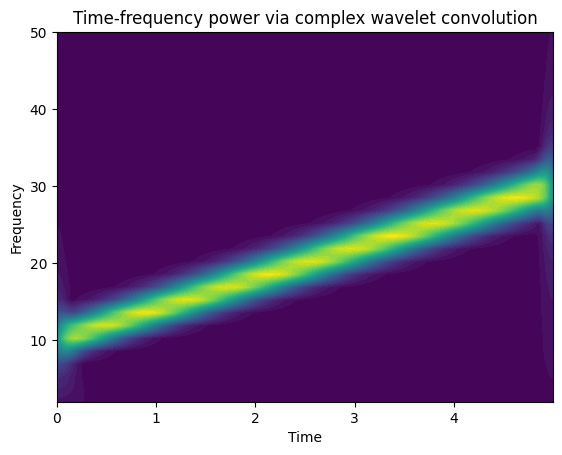

In [ ]:
## Morlet wavelet convolution

# frequencies used in analysis
nfrex = 30
frex = np.linspace(2,50,nfrex)
wtime =np.arange(-2,2,1/fs)
gausS = np.linspace(5,35,nfrex)
print(frex,'\n',wtime,'\n',gausS)

# convolution parameters
nconv = len(wtime) + npnts -1
halfw = np.floor(len(wtime)/2)
print(len(wtime),npnts,nconv,halfw)

# initialize time-freq matrix
tf = np.zeros((nfrex,npnts)) #30 x 5000
print(tf.shape)

# FFT
signalX = scipy.fftpack.fft(signal,nconv)

#wavelet
for fi in range(0,nfrex):
  # create wavelet
  s = (gausS[fi]/(2*np.pi*frex[fi])) **2
  cmw = np.multiply(np.exp(1j*2*np.pi*frex[fi]*wtime), np.exp((-wtime**2)/s))

  #fft
  cmwX = scipy.fftpack.fft(cmw,nconv)
  cmwX = cmwX/max(cmwX)

  # convolution result is inverse FFT of pointwise multiplication of spectra
  convres = scipy.fftpack.ifft(np.multiply(signalX,cmwX))
  tf[fi,:] = 2*np.abs(convres[range(int(halfw+1),int(len(convres)-halfw+2))])

plt.contourf(time,frex,tf,40)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time-frequency power via complex wavelet convolution')
plt.show()

## Windowing and Welch's method

[0.000e+00 1.000e-03 2.000e-03 ... 3.997e+00 3.998e+00 3.999e+00]


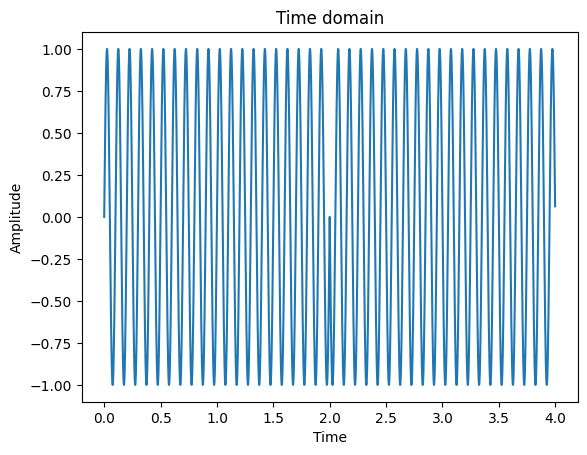

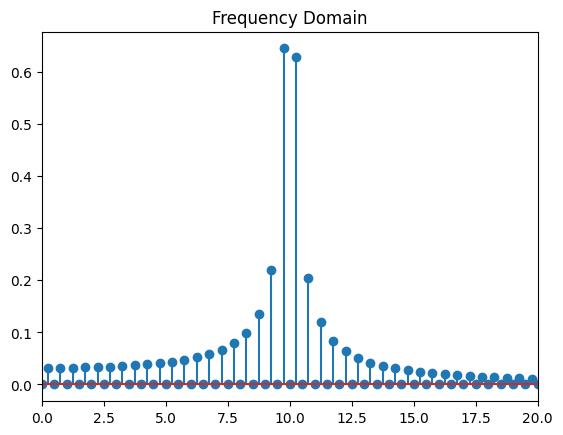

In [ ]:
# Create signal
srate = 1000
npnts = 2000 # actually this times 2!
time = np.arange(0,npnts*2)/srate #4 seconds
freq = 10
print(time)

# create signal
sigP1 = np.sin(2*np.pi*freq*time[0:npnts])
sigP2 = np.sin(2*np.pi*freq*time[0:npnts] + np.pi)
signal = np.concatenate((sigP1,sigP2),axis=0)

plt.plot(time,signal)
plt.title('Time domain')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#FFT
hz = np.linspace(0,srate/2,int(np.floor(len(time)/2)+1))
signalX = scipy.fftpack.fft(signal)/len(time)

plt.stem(hz,2*abs(signalX[0:len(hz)]))
plt.title('Frequency Domain')
plt.xlim(0,freq*2)
plt.show()




```
At 10 Hz, energy = 0
```



4.0
(501,)


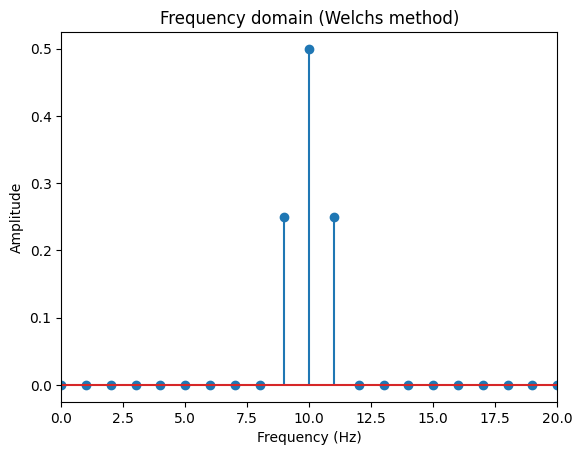

In [ ]:
## Now for Welch's method

winlen = 1000 # window length in points (500 makes freq res lower, 751 is bad choice here)
nbins = np.floor(len(time)/winlen)
print(nbins)

# Frequency vector for small windows
hzL = np.linspace(0,srate/2,int(np.floor(winlen/2)+1))

#initialize time frequency matrix
welchspect = np.zeros(len(hzL))
print(welchspect.shape)

# Hann taper
hwin = .5*(1-np.cos(2*np.pi*(np.arange(0,winlen))/(winlen-1)))

# loop
for ti in range(int(nbins)):
    #extract part of the signal
    tidx = range((ti-1)*winlen+1, ti*winlen+1)
    tmpdata = signal[tidx]

    # FFT of these data
    x  = scipy.fftpack.fft(hwin*tmpdata)/winlen

    # put in matrix
    welchspect = welchspect + 2*np.abs(x[0:len(hzL)])

# divide by bins to complete average
welchspect = welchspect/nbins

#plot
plt.stem(hzL,welchspect)
plt.xlim(0,freq*2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain (Welch''s method)')
plt.show()




```
with Welch method, we see 10Hz.

win len = 500  ==> low freq res
win len = 751 ==> no 10Hz
```



## Instantaneous Frequency

4000
[ 7.          7.00225056  7.00450113 ... 15.99549887 15.99774944
 16.        ]


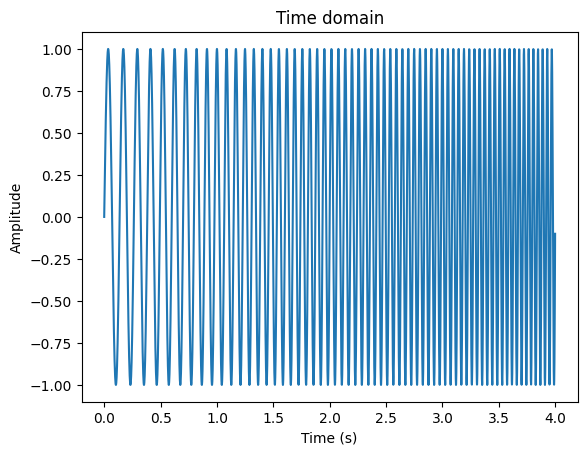

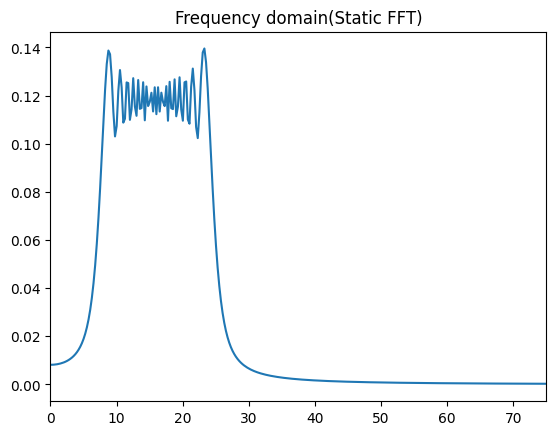

<ipython-input-38-8c4c0c1abf74>:41: DeprecationWarning: scipy.unwrap is deprecated and will be removed in SciPy 2.0.0, use numpy.unwrap instead
  instfreq = np.diff(scipy.unwrap(angels))/ (2*np.pi/srate) #diff = discrete derivative


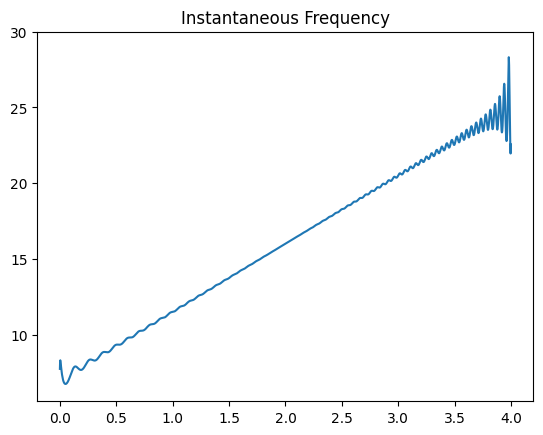

In [ ]:
srate = 1000
time = np.arange(0,4,1/srate)
pnts = len(time)
print(pnts)


#Frequency range for linear chirp
f = [7,25]

# chirp signal
ff = np.linspace(f[0],np.mean(f),pnts)
print(ff)
signal = np.sin(2*np.pi*ff*time)

# time-domain signal
plt.plot(time,signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time domain')
plt.show()





#FFT
signalX = scipy.fftpack.fft(signal)/pnts
hz = np.linspace(0,srate/2, int(np.floor(pnts/2)-1))
amp= 2*np.abs(signalX)

plt.plot(hz,amp[0:len(hz)])
plt.title('Frequency domain(Static FFT)')
plt.xlim(0,np.minimum(srate/2,f[1]*3))
plt.show()




# Compute instantaneous Freq
angels = np.angle(scipy.signal.hilbert(signal)) #compute phase angle
instfreq = np.diff(scipy.unwrap(angels))/ (2*np.pi/srate) #diff = discrete derivative

#Plot
plt.plot(time[:-1],instfreq)
plt.ylim(f[0]*.8, f[1]*1.2)
plt.title('Instantaneous Frequency')
plt.show()